In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly 
import plotly.express as px
import plotly.offline as pyo 
import cufflinks as cf 
from plotly.offline import init_notebook_mode,plot,iplot
%matplotlib inline 

In [34]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [35]:
iris = pd.read_csv('Iris.csv')

In [36]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
iris.drop(['Id'],axis=1,inplace=True)

# Visulizing our data

In [38]:
px.scatter(iris,x ='Species',y ='PetalWidthCm',size='PetalWidthCm')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

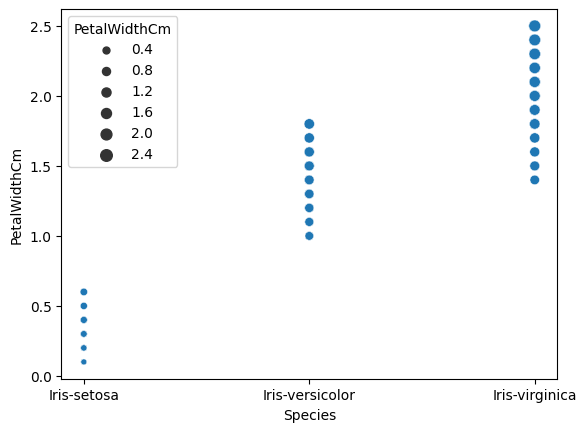

In [39]:
sns.scatterplot(x =iris['Species'],y =iris['PetalWidthCm'],size=iris['PetalWidthCm'])

In [40]:
px.line(iris,x ='Species',y ='PetalWidthCm')

In [41]:
iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalWidthCm':'PetalWidth','PetalLengthCm':'PetalLength'},inplace=True)

In [42]:
iris


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
px.scatter_matrix(iris,color='Species',title='iris',dimensions=['SepalLength','SepalWidth','PetalWidth','PetalLength'])

# Data Processing

In [44]:
x = iris.drop(['Species'],axis=1)

In [45]:
y = iris['Species']

In [46]:
x

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

![Alt text](image.png)

 One-Hot Encoding generates several binary columns, according to the number of distinct categories, whereas Label Encoding only generates a single column for the categorical variable.

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)


In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Iris-setosa = 0
Iris-versicolor= 1
Iris-virginica = 2

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 


 

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))


1.0


In [52]:
prediction_dt = dt.predict(X_test)
prediction_dt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score_dt = accuracy_score(y_test,prediction_dt)*100
accuracy_score_dt

100.0

In [54]:
Category = ['Iris-setosa','Iris-versicolor','Iris-virginica']

In [116]:
Data_x = np.array([[5.1,3.5,1.4,1.5]])
Data_x_pre = dt.predict(Data_x)

c:\Users\samia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [56]:
Data_x_pre

array([0])

In [57]:
print(Category[int(Data_x_pre)])

Iris-setosa


C:\Users\samia\AppData\Local\Temp\ipykernel_9296\3297791150.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,prediction_dt)
mse 

0.0

In [70]:
rmse = np.sqrt(mse)
rmse

0.0

# KNN Algorithm

For knn gave STD VAlues of X_train and Y_train

In [58]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [59]:
X_train_std

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_std, y_train)
print(knn.score(X_train_std, y_train))

0.9583333333333334


In [61]:
knn_predict = knn.predict(X_test_std)
knn_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [62]:
knn_accuracy = accuracy_score(y_test,knn_predict)
knn_accuracy

0.9666666666666667

In [63]:
Data_x = std.fit_transform(Data_x)
knn_Data_pre = knn.predict(Data_x)
knn_Data_pre

array([1])

In [64]:
print(Category[int(knn_Data_pre)])

Iris-versicolor


C:\Users\samia\AppData\Local\Temp\ipykernel_9296\1238146650.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,knn_predict)

In [66]:
mse

0.03333333333333333

In [67]:
rmse = np.sqrt(mse)
rmse

0.18257418583505536

## Using better evaluation technique - Cross Validation

In [71]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [72]:
rmse_scores

array([0.        , 0.25819889, 0.        , 0.        , 0.36514837,
       0.25819889, 0.25819889, 0.        , 0.        , 0.        ])

In [73]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [74]:
print_scores(rmse_scores)

Scores: [0.         0.25819889 0.         0.         0.36514837 0.25819889
 0.25819889 0.         0.         0.        ]
Mean:  0.11397450409115942
Standard deviation:  0.14262940002155103


In [75]:
scores = cross_val_score(dt, x, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [76]:
rmse_scores

array([0.        , 0.25819889, 0.        , 0.25819889, 0.25819889,
       0.36514837, 0.25819889, 0.        , 0.        , 0.        ])

In [77]:
print_scores(rmse_scores)

Scores: [0.         0.25819889 0.         0.25819889 0.25819889 0.36514837
 0.25819889 0.         0.         0.        ]
Mean:  0.13979439306587552
Standard deviation:  0.143029813910749


# K Mean Clustering

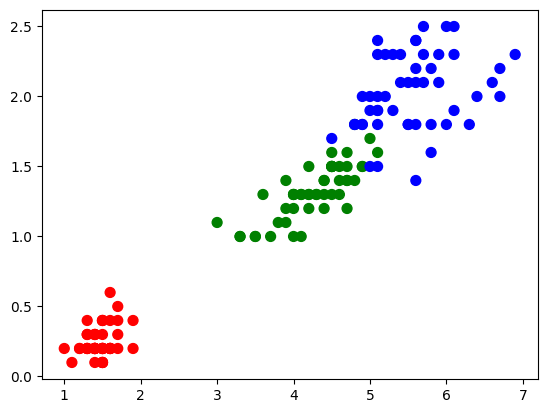

In [84]:
colormap = np.array(['Red','green','blue'])
fig = plt.scatter(iris['PetalLength'],iris['PetalWidth'],c = colormap[y],s=50)

In [86]:
x

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


n_jobs allows you to take advantage of multi-core processors to parallelize the computation when fitting the K-means model. This can significantly reduce the time it takes to train the model, especially for large datasets or a high number of clusters.

When n_jobs is set to -1 (the default), it uses all available CPU cores for parallel processing. You can also specify a positive integer, such as 2, 4, or any other number, to limit the number of cores used.

In [90]:
from sklearn.cluster import KMeans
km  = KMeans(n_clusters=3,random_state=42,n_jobs =4)
km.fit(x)


c:\Users\samia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [91]:
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [93]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [126]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

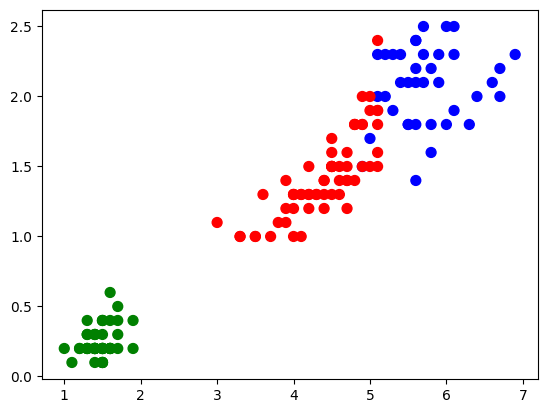

In [94]:
colormap = np.array(['Red','green','blue'])
fig = plt.scatter(iris['PetalLength'],iris['PetalWidth'],c = colormap[km.labels_],s=50)

In [102]:
x.iloc[:,2]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLength, Length: 150, dtype: float64

Text(0.5, 1.0, 'Predicted data')

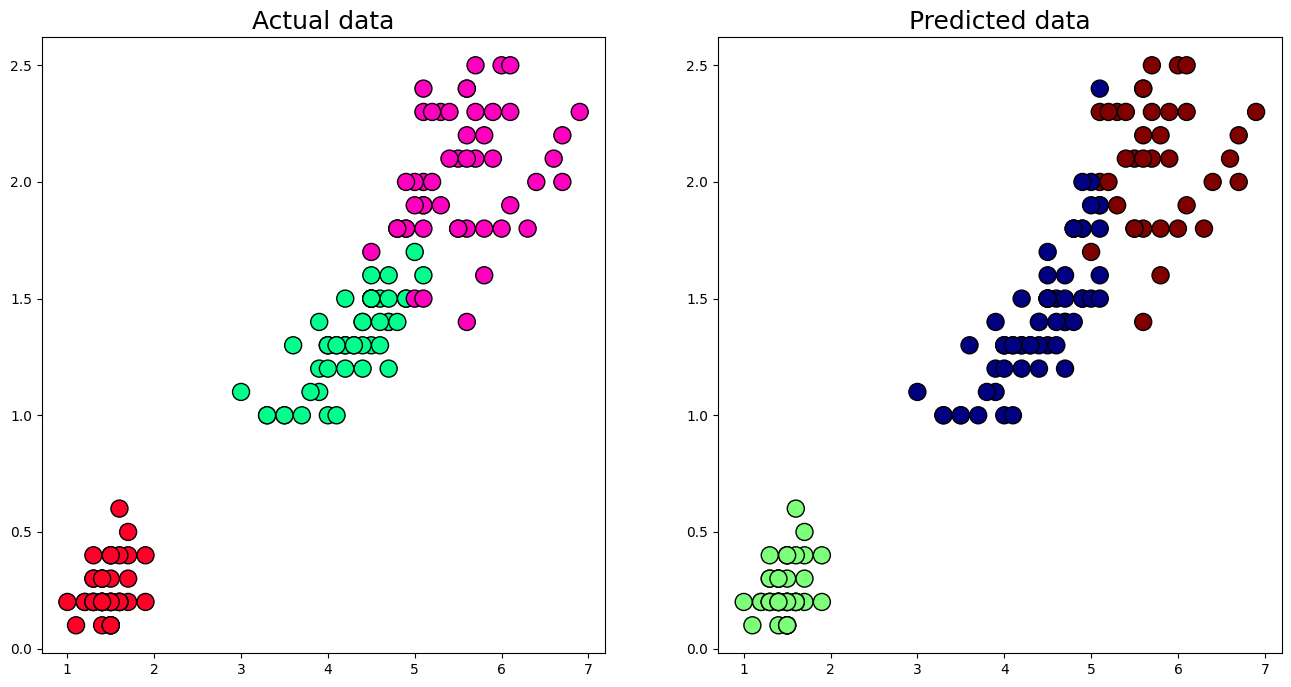

In [107]:
labels = km.labels_
fig,axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(x.iloc[:,2],x.iloc[:,3],c=y,cmap='gist_rainbow',edgecolor='k',s=150)
axes[1].scatter(x.iloc[:,2],x.iloc[:,3],c=labels,cmap='jet',edgecolor='k',s=150)
axes[0].set_title('Actual data',fontsize = 18)
axes[1].set_title('Predicted data',fontsize = 18)

In [122]:
custom_kn = np.array([[5.1,3.5,1.4,1.5]])


In [128]:
custom_km_predict  = km.predict(custom_kn)
custom_km_predict[0]
print(Catagory_kmeans[int(custom_km_predict[0])])

Iris-Setosa


c:\Users\samia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

